## Credit Card Fraud Detection Using Logistic Regression

With the great increase in credit card transactions, credit card fraud has increasing excessively in recent years. Hence, it has become imperative that we find a solution to the problem of credit card information security and a method to detect fraudulent credit card transactions. Over the years, many Data Mining techniques have been applied in credit card fraud detection. 

The focus of this project is to try different model that would attempt to maximally detect credit card fraud and minimizing false positive cases. The major objective would be to apply feature engineering to select key features from the dataset that helps to detect fraudulent transactions the most, and then compare the performance of different machine learning models in terms of the detection accuracy.

The data for this project is taken from Kaggle Website,https://www.kaggle.com/dalpozz/creditcardfraud

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

The dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 

Project follows three major steps:
1. Data preparation
2. Applying different algorithms
3. Interpret the results




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn.feature_selection import RFE
%matplotlib inline

#### Load the Data

In [36]:
data=pd.read_csv("creditcard.csv")

In [37]:
data_org=data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

#### Display the Target Classes

In [39]:
LABELS = ["Normal", "Fraud"]

0    284315
1       492
Name: Class, dtype: int64

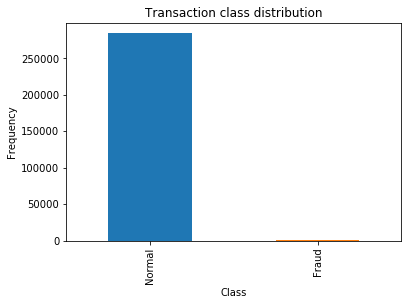

In [40]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', )
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");
count_classes

Clearly the data is totally unbalanced

In [41]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


From the above table we can see that most of the features are normalized, except for Amount.

#### Data Preparation

###### 1. Normalize Amount feature.


In [42]:
data['normAmt']= StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

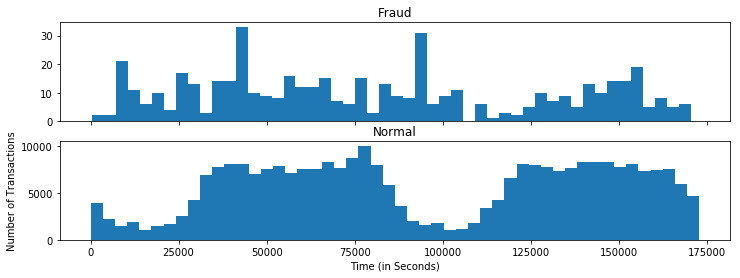

In [43]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(data['Time'][data['Class'] == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data['Time'][data['Class'] == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

As there is no significant difference between two graph 'Time' feature is dropped.

In [44]:
data=data.drop(['Amount','Time'],axis=1)

Before handling Unbalanced data, split the data into train and test data. This is done to maintain the novelty of the test data.

For train and test data split, I am using 'StratifiedShuffleSplit' function to maintain the samle ratio of two classes in train and test data.

In [45]:
data_f=data.loc[:,data.columns != 'Class']
data_l=data["Class"]
sss = StratifiedShuffleSplit(data_l, n_iter=1, test_size=0.2, random_state=0)
len(sss)
for train_index, test_index in sss:
    print("TRAIN:", train_index, "TEST:", test_index)
    train_X, test_X = data_f.loc[train_index], data_f.loc[test_index]
    train_y, test_y = data_l.loc[train_index], data_l.loc[test_index]

TRAIN: [ 36001  12844   2873 ..., 269968 175960  47973] TEST: [159949  15295 260353 ..., 211932  70523  97767]


In [46]:
train_X.shape

(227845, 29)

Handling Unbalanced data
## 2.Resampling Data

Resampling is a method that will process the data to have an approximate 50-50 ratio.

###  1. UNDER-sampling data

This method rebalances the dataset by randomly selecting "x" amount of sample from the majority class, "x" being the total number of records with the minority class.Hence,total number of Instances in the datset would be double the number of instances in minority class.

 

In [47]:
countClasses=pd.value_counts(train_y)
num_of_frauds=countClasses[1]
print("Number of Fraudlent transactions in train data:",num_of_frauds)
index_of_frauds=train_X[train_y==1].index
index_of_normal=train_X[train_y==0].index

Number of Fraudlent transactions in train data: 394


In [48]:
# randomly choose 394 non fraudulent transactions from total set.
randix_of_normal=np.random.choice(index_of_normal,num_of_frauds,replace=False)

In [49]:
# concatenate both Class 0 and Class 1 indices
full_index=np.concatenate([randix_of_normal,index_of_frauds])

In [50]:
data_X=train_X.loc[full_index,:]
data_y=train_y.loc[full_index]
print("UnderSampled dataset size:" ,data_X.shape[0])


UnderSampled dataset size: 788


Split Sampled data into train and test data

In [77]:
sample_train_X,sample_test_X,sample_train_y,sample_test_y=train_test_split(data_X,data_y,test_size=.2,random_state = 0)
print("Sample train_X:" , sample_train_X.shape)
print("Sample train_y:" , sample_train_y.shape)
print("Sample test_X:" , sample_test_X.shape)
print("Sample test_y:" , sample_test_y.shape)

Sample train_X: (630, 29)
Sample train_y: (630,)
Sample test_X: (158, 29)
Sample test_y: (158,)


GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter, and helps in choosing Best Possible Hyperparamter.
Here I am using GridSearchCV to determine Best hyper paramter 'C' for logistic Regression.

In [78]:
grid = {
        'C': np.power(10.0, np.arange(-3, 5))
    }
clf = LogisticRegression(penalty='l2')
gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=10)
gs.fit(sample_train_X, sample_train_y)

print ('gs.best_score_:', gs.best_score_)
best= gs.best_params_
best

gs.best_score_: 0.978281810036


{'C': 10.0}

In [79]:
import itertools

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##### Apply Logistic Regression on UNDER Sampled data
Train the model Using Logistic Regression , with Best hyperparameter chosen from GridSearchCV function ,and 'l2' regularization. 
Test the model performance using undersampled test data

Recall metric in the testing dataset Class 1:  0.923076923077
Recall metric in the testing dataset Class 0:  0.9875


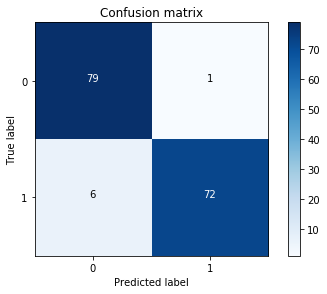

In [80]:
clf = LogisticRegression(C = best['C'], penalty = 'l2')
clf.fit(sample_train_X, sample_train_y)
y_pred_undersample = clf.predict(sample_test_X)

# Compute confusion matrix
cnf_matrix = confusion_matrix(sample_test_y,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset Class 1: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Recall metric in the testing dataset Class 0: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

Test the model trained usin undersampled data using original test data

Recall metric in the testing dataset Class 1:  0.877551020408
Recall metric in the testing dataset Class 0:  0.963843556556


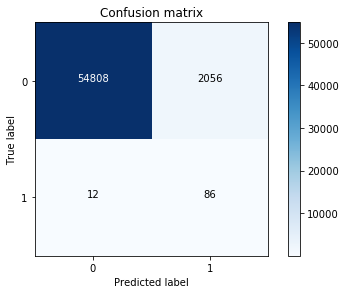

In [55]:
y_pred = clf.predict(test_X)

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset Class 1: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Recall metric in the testing dataset Class 0: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

### 2. OverSampling data 

Load the data, and split the data set into train and test data


In [65]:
data = data_org
data=data.drop(['Amount','Time'],axis=1)
data_f=data.loc[:,data.columns != 'Class']
data_l=data["Class"]
s = StratifiedShuffleSplit(data_l, n_iter=1, test_size=0.2, random_state=0)
for train_index, test_index in s:
    print("TRAIN:", train_index, "TEST:", test_index)
    train_X, test_X = data_f.loc[train_index], data_f.loc[test_index]
    train_y, test_y = data_l.loc[train_index], data_l.loc[test_index]

TRAIN: [ 36001  12844   2873 ..., 269968 175960  47973] TEST: [159949  15295 260353 ..., 211932  70523  97767]


Oversampling of minority class is done using an appraoch call Synthetic Minority Over-sampling Technique(SMOTE).
SMOTE algorithm creates artificial data based on feature space (rather than data space) similarities from minority samples. We can also say, it generates a random set of minority class observations to shift the classifier learning bias towards minority class.

In [66]:
from imblearn.over_sampling import SMOTE #Over sampling
sm = SMOTE(ratio='auto',kind='regular')
X_sampled,y_sampled = sm.fit_sample(train_X,train_y.values.ravel())
print("OverSampled dataset size:",X_sampled.shape[0])
print("OverSampled dataset size class 0:",X_sampled[y_sampled==0].shape[0])
print("OverSampled dataset size class 1:",X_sampled[y_sampled==1].shape[0])


OverSampled dataset size: 454902
OverSampled dataset size class 0: 227451
OverSampled dataset size class 1: 227451


Determine the best hyper parameter using GridSerachCV function

In [67]:
grid = {
        'C': np.power(10.0, np.arange(-3, 3))
    }
clf1 = LogisticRegression(penalty='l2')
gs = GridSearchCV(clf, grid, scoring='f1', cv=10)
gs.fit(X_sampled,y_sampled)

print ('gs.best_score_:', gs.best_score_)
best1= gs.best_params_
best1



gs.best_score_: 0.949356619051


{'C': 10.0}

Trained the model using Over sampled data and test the model using Original test data.
Model is traied using previous step determined hyper parameter and 'l2' regularization.

Recall metric in the testing dataset Class 1:  0.877551020408
Recall metric in the testing dataset Class 0:  0.975766741699


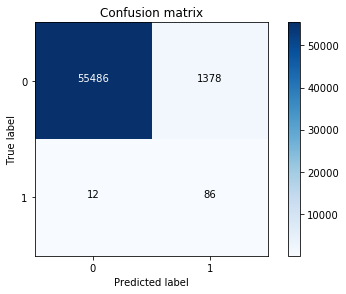

In [68]:
clf1 = LogisticRegression(C = best1['C'], penalty = 'l2')
clf1.fit(X_sampled,y_sampled)
y_pred = clf1.predict(test_X)

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset Class 1: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Recall metric in the testing dataset Class 0: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

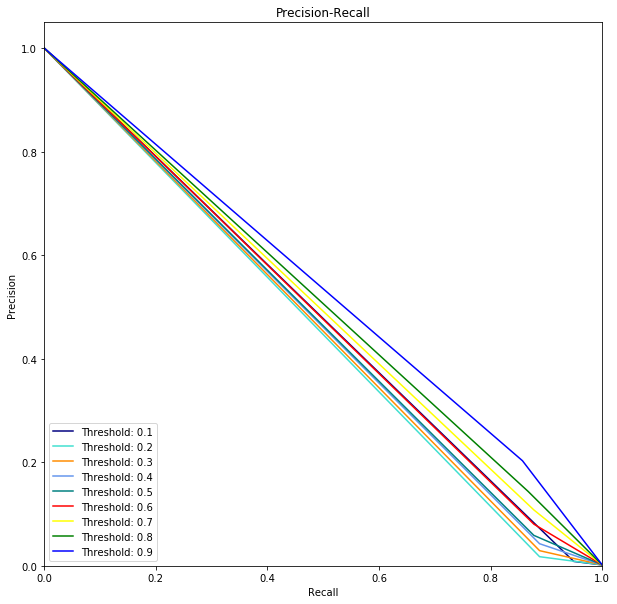

In [69]:
from itertools import cycle

#clf = LogisticRegression(C = 0.001, penalty = 'l2')
#clf.fit(train_X, train_y)
y_pred = clf1.predict_proba(test_X)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(10,10))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(test_y,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall')
    plt.legend(loc="lower left")

From the above precsion-recall graph, we can see that , higher precision/less False Postives can be achieved for threshold of .9 and higher recall/high fraudulant cases can be identified for threshold 0.4 or below

Recall metric in the testing dataset Class 1:  0.857142857143
Recall metric in the testing dataset Class 0:  0.994196679797


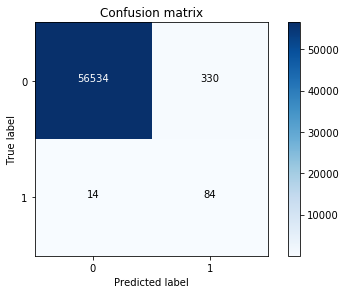

In [70]:
y_pred = clf1.predict_proba(test_X)
y_test_predictions_prob = y_pred[:,1] > .9
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y,y_test_predictions_prob )
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset Class 1: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Recall metric in the testing dataset Class 0: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset Class 1:  0.887755102041
Recall metric in the testing dataset Class 0:  0.965672481711


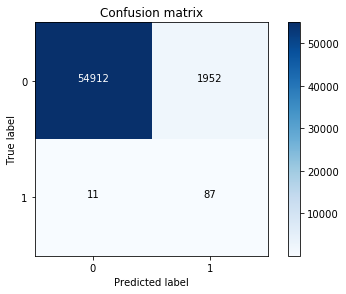

In [71]:
y_pred = clf1.predict_proba(test_X)
y_test_predictions_prob = y_pred[:,1] > .4
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y,y_test_predictions_prob )
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset Class 1: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Recall metric in the testing dataset Class 0: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

### 3. No Resampling 

Now train the model using original training data , by choosing hyper parameter 'C' using GridSearchCV function, and 'l2' regularization. Test the model using original testing data.

In [63]:
grid = {
        'C': np.power(10.0, np.arange(-3, 3))
    }
clf1 = LogisticRegression(penalty='l2')
gs = GridSearchCV(clf, grid, scoring='f1', cv=10)
gs.fit(train_X,train_y)

print ('gs.best_score_:', gs.best_score_)
best1= gs.best_params_
best1

gs.best_score_: 0.726381703212


{'C': 1.0}

Recall metric in the testing dataset Class 1:  0.632653061224
Recall metric in the testing dataset Class 0:  0.999806555993


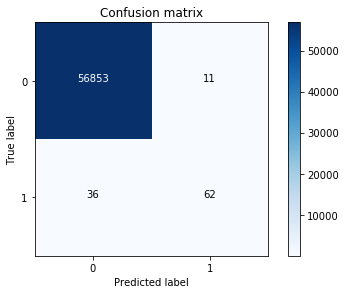

In [29]:
clf1 = LogisticRegression(C = best1['C'], penalty = 'l2')
clf1.fit(train_X, train_y)
y_pred = clf1.predict(test_X)

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset Class 1: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Recall metric in the testing dataset Class 0: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

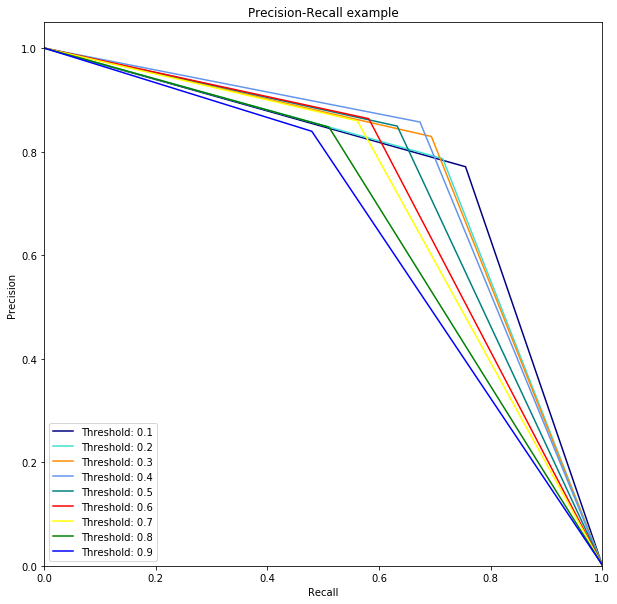

In [30]:
from itertools import cycle

#clf = LogisticRegression(C = 0.001, penalty = 'l2')
#clf.fit(train_X, train_y)
y_pred = clf1.predict_proba(test_X)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(10,10))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(test_y,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

Recall metric in the testing dataset Class 1:  0.673469387755
Recall metric in the testing dataset Class 0:  0.999806555993


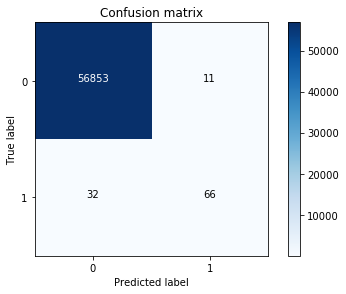

In [31]:
y_pred = clf1.predict_proba(test_X)
y_test_predictions_prob = y_pred[:,1] > .4
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y,y_test_predictions_prob )
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset Class 1: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Recall metric in the testing dataset Class 0: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset Class 1:  0.755102040816
Recall metric in the testing dataset Class 0:  0.999613111986


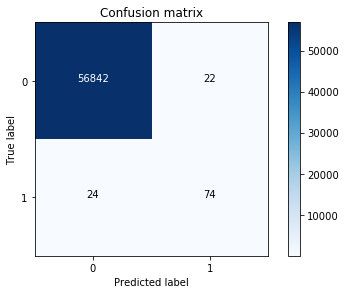

In [32]:
y_pred = clf1.predict_proba(test_X)
y_test_predictions_prob = y_pred[:,1] > .1
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y,y_test_predictions_prob )
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset Class 1: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Recall metric in the testing dataset Class 0: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

### Feature Selection

The main aim of the feature selection step is to identify features that does not contribute in identifying Classes, and to identify those features that help most in distinguishing two classes.

Recall metric in the testing dataset:  0.626903553299
Recall metric in the testing dataset:  0.999854913806


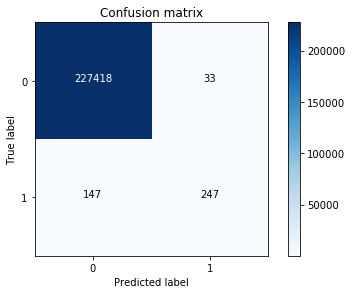

In [33]:
y_pred = clf1.predict(train_X)

# Compute confusion matrix
cnf_matrix = confusion_matrix(train_y,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Recall metric in the testing dataset: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

### 1. Feature Elimination

Unimportant features are removed using Recursive Feature Elimination(RFE).

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [34]:
# create a base classifier used to evaluate a subset of attributes
model =LogisticRegression()
# create the RFE model and select 24 attributes
rfe = RFE(model, 24)
rfe = rfe.fit(train_X, train_y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
train_X.columns[rfe.support_]

[ True False  True  True  True  True  True  True  True  True  True False
  True  True  True  True False False  True  True  True  True  True  True
 False  True  True  True  True]
[1 5 1 1 1 1 1 1 1 1 1 6 1 1 1 1 2 4 1 1 1 1 1 1 3 1 1 1 1]


Index(['V1', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V13',
       'V14', 'V15', 'V16', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V26',
       'V27', 'V28', 'normAmt'],
      dtype='object')

In [35]:
data=data_org
data=data.drop(['Amount','Time','V1','V3','V12','V21','V24','V14','V13','V25','V26','V27','V18'],axis=1)
data_f=data.loc[:,data.columns != 'Class']
data_l=data["Class"]
s = StratifiedShuffleSplit(data_l, n_iter=1, test_size=0.2, random_state=0)
for train_index, test_index in s:
    print("TRAIN:", train_index, "TEST:", test_index)
    train_X, test_X = data_f.loc[train_index], data_f.loc[test_index]
    train_y, test_y = data_l.loc[train_index], data_l.loc[test_index]

TRAIN: [ 36001  12844   2873 ..., 269968 175960  47973] TEST: [159949  15295 260353 ..., 211932  70523  97767]


In [36]:
train_X.shape

(227845, 18)

Recall metric in the testing dataset Class1:  0.61421319797
Recall metric in the testing dataset Class0:  0.999859310357


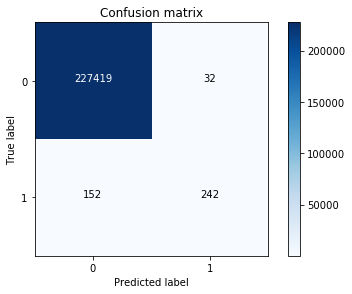

In [37]:
clf1 = LogisticRegression(C = best1['C'], penalty = 'l2')
clf1.fit(train_X, train_y)
y_pred = clf1.predict_proba(train_X)
y_test_predictions_prob = y_pred[:,1] > .5
# Compute confusion matrix
cnf_matrix = confusion_matrix(train_y,y_test_predictions_prob )
np.set_printoptions(precision=2)


print("Recall metric in the testing dataset Class1: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Recall metric in the testing dataset Class0: ", cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### 2. Indentify Important Features

To Identify Most important features following steps were executed:
1. Determine the Coefficient of the features in the decision function.
   coef_ is of shape (1, n_features) when the given problem is binary.
2. Multiply coef_ with each feature for every training data, and the take the mean to determine the importance of    each feature

In [38]:
clf1.coef_

array([[ 0.26,  0.94,  0.31, -0.18,  0.26, -0.19,  0.13, -0.92,  0.37,
         0.05, -0.45, -0.14, -0.09, -0.21, -0.03, -0.06, -0.03,  0.08]])

###### True class 0 and predicted class 0

In [1]:
plt.figure(figsize=(12,8))
q=p[:][p[:][0]==0]
q=q[:][q[:][1]==False]
q.index
plt.bar(np.arange(18),pd.DataFrame(train_X.iloc[q.index].values*clf1.coef_).mean(axis=0))
o=plt.xticks(np.arange(18),train_X.columns.values)
plt.xlabel('Features')
plt.ylabel('value')

NameError: name 'plt' is not defined

##### True class 1 and predicted class 1

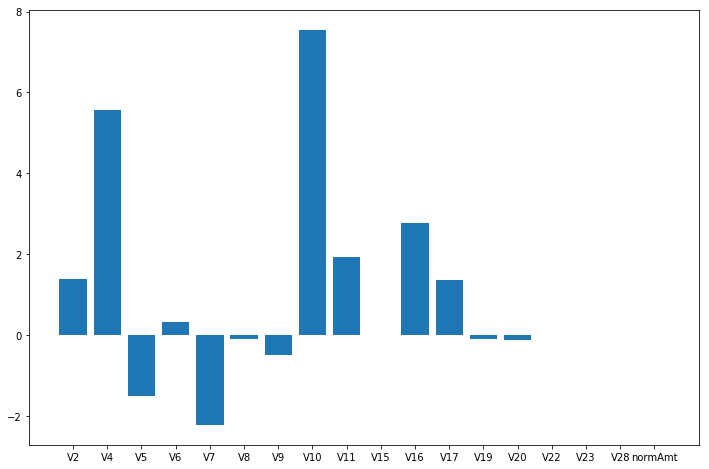

In [41]:
plt.figure(figsize=(12,8))
q=p[:][p[:][0]==1]
q=q[:][q[:][1]==True]
q.index
plt.bar(np.arange(18),pd.DataFrame(train_X.iloc[q.index].values*clf1.coef_).mean(axis=0))
o=plt.xticks(np.arange(18),train_X.columns.values)


##### True class 1 and predicted class 0

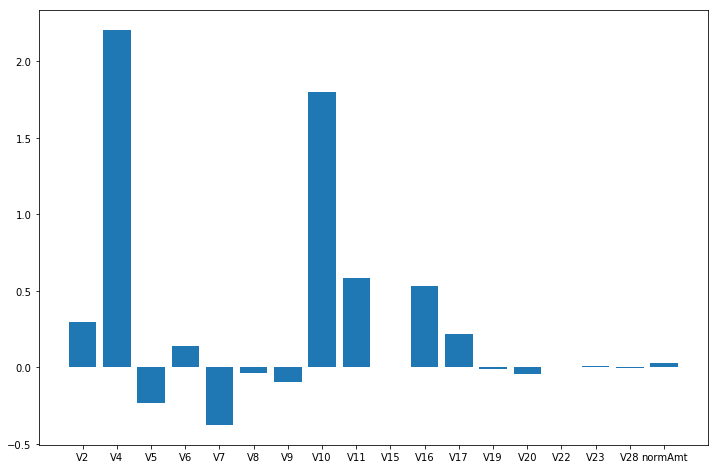

In [42]:
plt.figure(figsize=(12,8))
q=p[:][p[:][0]==1]
q=q[:][q[:][1]==False]
q.index
plt.bar(np.arange(18),pd.DataFrame(train_X.iloc[q.index].values*clf1.coef_).mean(axis=0))
o=plt.xticks(np.arange(18),train_X.columns.values)


From the above graph , we can see that Features such as 'V4','V10','V11','V16' are most important features in dtermining whether the transaction belong to class 0 or 1.

Hence,added tiny Extra weights to further increase the the feature importance of the above classes. 
Then the model was trained and tested using train and test data respectively.

Recall metric in the testing dataset:  0.774111675127


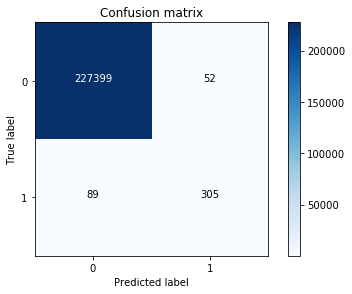

In [43]:
y_pred = clf1.predict_proba(train_X) 
y_pred[:,1]=y_pred[:,1]+  train_X['V10']*-.050+ train_X['V11'] *.085+ train_X['V16']*-.050
y_test_predictions_prob = y_pred[:,1] > .5
# Compute confusion matrix
cnf_matrix = confusion_matrix(train_y,y_test_predictions_prob )
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0.734693877551


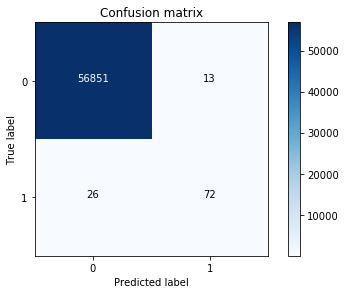

In [44]:
y_pred = clf1.predict_proba(test_X)
y_pred[:,1]=y_pred[:,1]+ test_X['V10']*-.050+ test_X['V11'] *.085+ test_X['V16']*-.050
y_test_predictions_prob = y_pred[:,1] > .5
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y,y_test_predictions_prob )
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

From the above graph, we can see that, by feature selection and futher increasing the importance of important features, we could identify more fraudulent transactions without increasing False positive cases.

References:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

http://scikit-learn.org/stable/modules/grid_search.html

http://albahnsen.com/files/Feature%20Engineering%20Strategies%20for%20Credit%20Card%20Fraud%20Detection_published.pdf

https://www.researchgate.net/publication/301335664_A_Novel_Machine_Learning_Approach_to_Credit_Card_Fraud_Detection